In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from collections import Counter

5. In der forsa-Umfrage (forsa Gesellschaft für Sozialforschung und statistische Analyse mbH) wer- (6) den jede Woche zufa ̈llig ausgewählte deutsche Bürger befragt, was Sie wählen würden, wenn
am na ̈chsten Sonntag Bundestagswahl wa ̈re. Am 30.10.2019 wurden 2501 Personen gefragt. Das Ergebnis der Umfrage ist in Sonntagsfrage.csv in der ersten Spalte gegeben. Nehmen Sie an,
Sie hätten ebenfalls das Alter der Befragten zur Verfügung.
    
    (a)überprüfen Sie,ob das Wahlergebnis der CDU/CSU drei Wochen nach der Bundestagswahl 2013 signifikant von dem Wahlergebnis    abweicht (41.5%)!
    
    (b) Visualisieren Sie den Datensatz
    
    (c) Unterteilen Sie die Befragten in zwei Kategorien: CDU/CSU Wähler und restliche Wähler. Überprüfen Sie, ob sich das Alter der befragten Personen signifikant unterscheidet! Wa ̈hlen Sie einen geeignet test in R und interpretieren Sie das Ergebnis

In [3]:
Sonntagsfrage = pd.read_csv("./data/Sonntagsfrage.csv")
Sonntagsfrage

,Person,Wahl,Alter
0,1,CDU/CSU,47
1,2,CDU/CSU,57
2,3,SPD,48
3,4,AfD,32
4,5,CDU/CSU,58
...,...,...,...
2496,2497,CDU/CSU,57
2497,2498,CDU/CSU,66
2498,2499,CDU/CSU,60
2499,2500,GRUENE,48


In [8]:
# a) Signifikanztest
countObject = Counter(Sonntagsfrage["Wahl"])
percentageCDUCSU = countObject['CDU/CSU'] / Sonntagsfrage["Wahl"].size
print("CDU/CSU Prozent: " + str(percentageCDUCSU))

# Chi Squared

#            Agegroup1     Other
# Obs %         4.17%      95.83%
# Exp %         3.1%       96.9%
# Not actually chi-square: (.0417-.031)^2/0.031 + (.9583-.969)^2/0.969 = 0.00381
chisquaredResult = (percentageCDUCSU-0.45)**2/0.45 + ((1 - percentageCDUCSU) - (1 - 0.45))**2/(1-0.45)
print(chisquaredResult)

# Source
# https://stats.stackexchange.com/questions/104323/chi-square-analysis-percentages

CDU/CSU Prozent: 0.42103158736505397
0.0033905815377313123


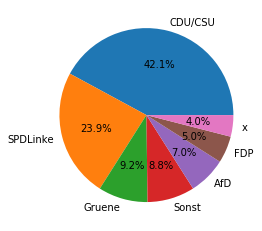

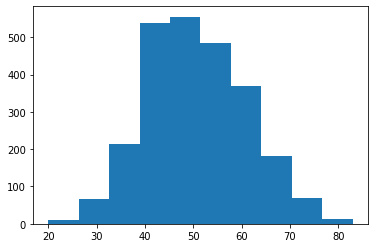

In [27]:
# b)
# Data to plot
labels = ['CDU/CSU', 'SPD' 'Linke', 'Gruene', 'Sonst', 'AfD', 'FDP', 'x']
sizes = [countObject['CDU/CSU'], countObject['SPD'], countObject['LINKE'], countObject['GRUENE'], countObject['Sonst'], countObject['AfD'], countObject['FDP']]

# Plot tv-like distribution of parties
plt.pie(sizes, labels=labels,autopct='%1.1f%%', labeldistance=1.1)
plt.show()

# Histogram age
plt.hist(Sonntagsfrage['Alter'])
plt.show()

In [33]:
# select relevant data
mask = (Sonntagsfrage['Wahl'] == 'CDU/CSU' )
cdu_voters = Sonntagsfrage.loc[mask]
mask = (Sonntagsfrage['Wahl'] != 'CDU/CSU' )
other_voters = Sonntagsfrage.loc[mask]

# Maybe this? https://www.isixsigma.com/tools-templates/hypothesis-testing/making-sense-two-sample-t-test/
stats.chisquare([other_voters["Alter"].mean(), cdu_voters["Alter"].mean()])

Power_divergenceResult(statistic=1.7852064699340695, pvalue=0.18151129939394536)

6. Importieren Sie den Datensatz von EuroStat: market size.csv. Der Datensatz erfasst die (6) Gesamtmenge der erzeugten Energie in GWh der 28 Mitgliedsstaaten der EU für 1999 - 2010. Untersuchen Sie, ob es zwischen der produzierten Strommenge 1999 und der produzierten Strom- menge in 2010 einen signifikanten Unterschied gibt! Visualisieren Sie die Daten der beiden Jahre
und alle Jahre und fu ̈hren sie einen geeigneten Test durch! Interpretieren Sie das Ergebnis.

In [29]:
market_size = pd.read_csv("./data/market_size.csv", sep=',' , encoding='latin-1')
market_size

,TIME,GEO,UNIT,PRODUCT,INDIC_NRG,Value
0,1999,Belgien,Gigawattstunde,Elektrizität,Bruttoelektrizitätserzeugung insgesamt,84514
1,1999,Tschechische Republik,Gigawattstunde,Elektrizität,Bruttoelektrizitätserzeugung insgesamt,64694
2,1999,Dänemark,Gigawattstunde,Elektrizität,Bruttoelektrizitätserzeugung insgesamt,38921
3,1999,Deutschland (bis 1990 früheres Gebiet der BRD),Gigawattstunde,Elektrizität,Bruttoelektrizitätserzeugung insgesamt,556300
4,1999,Estland,Gigawattstunde,Elektrizität,Bruttoelektrizitätserzeugung insgesamt,8281
...,...,...,...,...,...,...
331,2010,Finnland,Gigawattstunde,Elektrizität,Bruttoelektrizitätserzeugung insgesamt,80668
332,2010,Schweden,Gigawattstunde,Elektrizität,Bruttoelektrizitätserzeugung insgesamt,148609
333,2010,Vereinigtes Königreich,Gigawattstunde,Elektrizität,Bruttoelektrizitätserzeugung insgesamt,381771
334,2010,Norwegen,Gigawattstunde,Elektrizität,Bruttoelektrizitätserzeugung insgesamt,123640
